# Messi data exploration

<!-- Written report for this analysis can be found [here](../reports/messi_01_finding_leo.md) -->

In [1]:
# from statsbombpy import sb
import statsbomb as sb

In [3]:
comps = sb.Competitions().get_dataframe()
comps.describe(include="all")

,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
count,37.000000,37.000000,37,37,37,37,37,37
unique,NaN,NaN,5,7,2,20,9,8
top,NaN,NaN,Spain,La Liga,male,2018/2019,2020-07-29T05:00,2020-07-29T05:00
freq,NaN,NaN,16,16,33,3,22,28
mean,17.729730,25.675676,NaN,NaN,NaN,NaN,NaN,NaN
std,13.251098,16.721666,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,11.000000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,16.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,16.000000,39.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
comps[comps.country_name == "Spain"].describe(include="all")

,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
count,16.0,16.000000,16,16,16,16,16,16
unique,NaN,NaN,1,1,1,16,3,3
top,NaN,NaN,Spain,La Liga,male,2015/2016,2020-07-29T05:00,2020-07-29T05:00
freq,NaN,NaN,16,16,16,1,14,14
mean,11.0,25.750000,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,13.786467,NaN,NaN,NaN,NaN,NaN,NaN
min,11.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,11.0,21.750000,NaN,NaN,NaN,NaN,NaN,NaN
50%,11.0,25.500000,NaN,NaN,NaN,NaN,NaN,NaN
75%,11.0,38.250000,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
sb.Competitions().save_data()

In [35]:
sb.Matches(event_id=11, season_id=42).get_dataframe().head(5)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,last_updated,metadata,match_week,competition_stage,stadium,referee
0,303421,2020-07-19,17:00:00.000,11,42,206,217,0,5,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",38,"{'id': 1, 'name': 'Regular Season'}","{'id': 348, 'name': 'Estadio de Mendizorroza',...","{'id': 207, 'name': 'Juan Martínez', 'country'..."
1,303493,2020-06-23,22:00:00.000,11,42,217,215,1,0,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",31,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 183, 'name': 'Jesús Gil', 'country': {'..."
2,303516,2020-06-27,17:00:00.000,11,42,209,217,2,2,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",32,"{'id': 1, 'name': 'Regular Season'}","{'id': 653, 'name': 'Abanca-Balaídos', 'countr...","{'id': 451, 'name': 'Guillermo Cuadra', 'count..."
3,303680,2020-07-11,19:30:00.000,11,42,901,217,0,1,available,2020-12-18T12:10:38.985394,"{'data_version': '1.1.0', 'shot_fidelity_versi...",36,"{'id': 1, 'name': 'Regular Season'}","{'id': 622, 'name': 'Estadio Municipal José Zo...","{'id': 180, 'name': 'Antonio Mateu', 'country'..."
4,303532,2020-06-16,22:00:00.000,11,42,217,205,2,0,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",29,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 207, 'name': 'Juan Martínez', 'country'..."


In [42]:
for season_id in comps[comps.country_name == "Spain"].season_id.values:
    print(season_id)
    sb.Matches(event_id=11, season_id=season_id).save_data()

42
4
1
2
27
26
25
24
23
22
21
41
40
39
38
37


In [44]:
# sb.Lineups(event_id="303421").get_dataframe() #.query(team_name == "Barcelona")

In [24]:
shots = sb.Events(event_id="303421").get_dataframe(event_type="shot")

shots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   event_type        23 non-null     object 
 1   id                23 non-null     object 
 2   index             23 non-null     int64  
 3   period            23 non-null     int64  
 4   timestamp         23 non-null     object 
 5   minute            23 non-null     int64  
 6   second            23 non-null     int64  
 7   possession        23 non-null     int64  
 8   possession_team   23 non-null     object 
 9   play_pattern      23 non-null     object 
 10  off_camera        0 non-null      object 
 11  team              23 non-null     object 
 12  player            23 non-null     object 
 13  position          23 non-null     object 
 14  duration          23 non-null     float64
 15  under_pressure    4 non-null      object 
 16  statsbomb_xg      23 non-null     float64
 17 

In [45]:
# shots

In [27]:
shots[(shots.player == "Lionel Andrés Messi Cuccittini")].T #.head(5)

,6,8,11,17
event_type,shot,shot,shot,shot
id,2c6cab4a-8c41-4356-a28e-2dc55efb10fa,09dd70ba-bc95-413e-92e1-020d666fc6b0,dcb7134f-d234-48f3-8c12-89ccbe7c7eee,a1b9fe66-cf63-4907-9a32-84365344b2b7
index,760,941,1399,3331
period,1,1,1,2
timestamp,00:15:16.461,00:20:42.411,00:33:02.526,00:29:12.670
minute,15,20,33,74
second,16,42,2,12
possession,28,38,58,141
possession_team,Barcelona,Barcelona,Barcelona,Barcelona
play_pattern,Regular Play,From Free Kick,Regular Play,From Throw In


In [28]:
shots.outcome.value_counts()

Off T      7
Goal       5
Blocked    4
Saved      3
Post       3
Wayward    1
Name: outcome, dtype: int64

In [31]:
shots.type.value_counts()

Open Play    22
Free Kick     1
Name: type, dtype: int64

In [30]:
shots.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
event_type,23,1,shot,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,23,23,39a97936-7ca4-4277-8af5-464e6dde5d9b,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
index,23,NaN,NaN,NaN,1762.52,1287.25,182,707,1399,2926,3967
period,23,NaN,NaN,NaN,1.30435,0.470472,1,1,1,2,2
timestamp,23,23,00:29:12.670,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minute,23,NaN,NaN,NaN,39.913,30.594,2,14,33,65,93
second,23,NaN,NaN,NaN,27.5217,17.7863,0,11.5,28,41.5,57
possession,23,NaN,NaN,NaN,73.087,55.3804,3,26.5,58,126,166
possession_team,23,2,Barcelona,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
play_pattern,23,5,Regular Play,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
import seaborn as sns

https://towardsdatascience.com/advanced-sports-visualization-with-pandas-matplotlib-and-seaborn-9c16df80a81b

In [54]:
# import relevant libraries
%matplotlib inline
# import json
# from pandas.io.json import json_normalize
# import numpy as np
import seaborn as sns
# import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
# import squarify
# from functools import reduce

In [55]:
def draw_pitch(ax):
    # size of the pitch is 120, 80
    #Create figure

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,80], color="black")
    plt.plot([0,120],[80,80], color="black")
    plt.plot([120,120],[80,0], color="black")
    plt.plot([120,0],[0,0], color="black")
    plt.plot([60,60],[0,80], color="black")

    #Left Penalty Area
    plt.plot([14.6,14.6],[57.8,22.2],color="black")
    plt.plot([0,14.6],[57.8,57.8],color="black")
    plt.plot([0,14.6],[22.2,22.2],color="black")

    #Right Penalty Area
    plt.plot([120,105.4],[57.8,57.8],color="black")
    plt.plot([105.4,105.4],[57.8,22.5],color="black")
    plt.plot([120, 105.4],[22.5,22.5],color="black")

    #Left 6-yard Box
    plt.plot([0,4.9],[48,48],color="black")
    plt.plot([4.9,4.9],[48,32],color="black")
    plt.plot([0,4.9],[32,32],color="black")

    #Right 6-yard Box
    plt.plot([120,115.1],[48,48],color="black")
    plt.plot([115.1,115.1],[48,32],color="black")
    plt.plot([120,115.1],[32,32],color="black")

    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black",fill=False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    # arguments for arc
    # x, y coordinate of centerpoint of arc
    # width, height as arc might not be circle, but oval
    # angle: degree of rotation of the shape, anti-clockwise
    # theta1, theta2, start and end location of arc in degree
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

In [67]:
def draw_half_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([60,0], width = 60, height = 80, fill = False)
    #Right Penalty Area
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)

    #Right 6-yard Box
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = Arc((60,40),width = 8.1, height = 8.1, angle=0,theta1=270,theta2=90,color="black")
    centreSpot = plt.Circle((60,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, RightPenalty, RightSixYard, centreCircle, centreSpot, rightPenSpot, rightArc]
    for i in element:
        ax.add_patch(i)

In [110]:
def draw_pitch_right(ax):
    # size of the pitch is 120, 80
    #Create figure

    #Pitch Outline & Centre Line
#     plt.plot([0,0],[0,80], color="black")
#     plt.plot([0,120],[80,80], color="black")
#     plt.plot([120,120],[80,0], color="black")
#     plt.plot([120,0],[0,0], color="black")
#     plt.plot([60,60],[0,80], color="black")

    #Left Penalty Area
#     plt.plot([14.6,14.6],[57.8,22.2],color="black")
#     plt.plot([0,14.6],[57.8,57.8],color="black")
#     plt.plot([0,14.6],[22.2,22.2],color="black")

    #Right Penalty Area
    plt.plot([120,105.4],[57.8,57.8],color="black")
    plt.plot([105.4,105.4],[57.8,22.5],color="black")
    plt.plot([120, 105.4],[22.5,22.5],color="black")

    #Left 6-yard Box
#     plt.plot([0,4.9],[48,48],color="black")
#     plt.plot([4.9,4.9],[48,32],color="black")
#     plt.plot([0,4.9],[32,32],color="black")

    #Right 6-yard Box
    plt.plot([120,115.1],[48,48],color="black")
    plt.plot([115.1,115.1],[48,32],color="black")
    plt.plot([120,115.1],[32,32],color="black")

    #Prepare Circles
#     centreCircle = plt.Circle((60,40),8.1,color="black",fill=False)
#     centreSpot = plt.Circle((60,40),0.71,color="black")
#     leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")

    #Draw Circles
#     ax.add_patch(centreCircle)
#     ax.add_patch(centreSpot)
#     ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    # arguments for arc
    # x, y coordinate of centerpoint of arc
    # width, height as arc might not be circle, but oval
    # angle: degree of rotation of the shape, anti-clockwise
    # theta1, theta2, start and end location of arc in degree
#     leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
#     ax.add_patch(leftArc)
    ax.add_patch(rightArc)

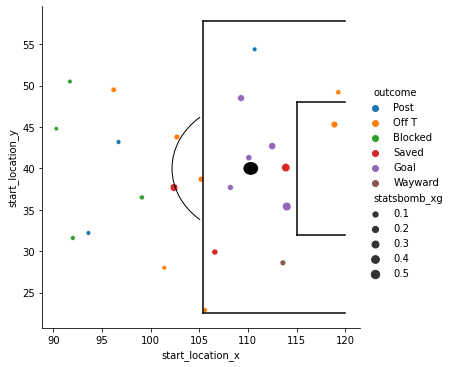

In [111]:
# fig = plt.figure()

# fig.set_size_inches(7, 5)
# ax=fig.add_subplot(1,1,1)
# g = sns.lmplot(x='start_location_x', y='start_location_y', size='statsbomb_xg', 
#            hue='team', data=shots, fit_reg=False, 
#            x_jitter=0.1, y_jitter=0.1, markers="o", palette="viridis") #, height=7)

g = sns.relplot(x='start_location_x', y='start_location_y', size='statsbomb_xg', hue="outcome",
#             sizes=(100, 400), alpha=.5, palette="muted", aspect=1.2,
#             height=7, 
                data=shots)

ax = plt.gca()
# draw_pitch(ax)
draw_pitch_right(ax)
# draw_half_pitch(ax)
# plt.axis('off')

plt.show()

In [121]:
def draw_posts():
    x=[36, 36, 44, 44]
    y=[0, 2.7, 2.7, 0]
    
    plt.plot(x, y, color="black")

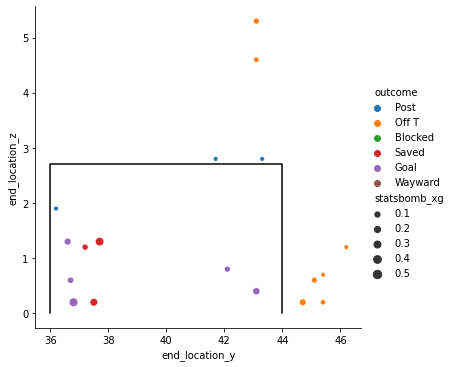

In [122]:
sns.relplot(x='end_location_y', y='end_location_z', size='statsbomb_xg', hue="outcome",
#             sizes=(100, 400), alpha=.5, palette="muted", aspect=1.2,
#             height=7, 
                data=shots)

draw_posts()
plt.show()